TASK:

Create NN with Keras to classify goods from dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Proposed NN initial architecture: - 
- # layers (in, den1, den2, out)
- activation func (Hidden: ReLU, Leaky ReLU, Parametric ReLU, ELU; Output: Softmax)
- # epoch (50 - 600)
- # neurons in layer (784, 128, 256, 10)
- batch size (32, 72)
- optimizer (SGD,  Adam)
- initial learning rate (0.025)
- validation rate in training data (40%)
Requirement of accuracy: >=0.91

# MODEL Adam_b32_ep100_class

In [49]:
from tensorflow import keras

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [51]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


#Extract all shirt indices -- to BALANCE -- shirt
indices_shirt = [i for i, x in enumerate(y_train) if x == 6]
x_train_list = x_train.tolist()
x_train_shirt = []
y_train_shirt = []
for index in range(0, len(x_train)):
    if index in indices_shirt:
        x_train_shirt.append(x_train_list[index])
        
for i in range(len(x_train_shirt)):
    y_train_shirt.append(6)

x_train_shirt = np.array(x_train_shirt)
y_train_shirt = np.array(y_train_shirt)

x_train = np.concatenate((x_train, x_train_shirt))
y_train = np.concatenate((y_train, y_train_shirt))



In [52]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 100 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя
n_hidden_3 = 256 # количество нейронов 3-го слоя
n_hidden_4 = 256 # количество нейронов 4-го слоя

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import pandas as pd
from copy import deepcopy

In [54]:
### Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# One-hot encode target variable if it is a multiclass problem
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)

#Set up class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculate class weights
# class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train_encoded), y = y_train_encoded)

# print(class_weights)

# #class_weights_dict = dict(enumerate(class_weights))
class_weights_dict = {0: 1, 1: 1, 2: 0.8, 3: 1, 4: 0.8, 5: 1, 6: 0.5, 7: 1, 8: 1, 9: 1}
print(class_weights_dict)



{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0.5, 7: 1, 8: 1, 9: 1}


In [55]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(784,)),
    Dropout(0.2),  
    Dense(n_hidden_2, activation='relu'),
    
    Dense(n_hidden_3, activation='relu'),
   
    Dense(n_hidden_4, activation='relu'),
    Dense(10, activation='softmax'),
])

In [56]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [58]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    class_weight=class_weights_dict,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/100
1438/1438 [==============================] - 11s 7ms/step - loss: 0.5159 - accuracy: 0.7550 - val_loss: 0.4575 - val_accuracy: 0.8327
Epoch 2/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.3942 - accuracy: 0.8134 - val_loss: 0.3855 - val_accuracy: 0.8563
Epoch 3/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.3595 - accuracy: 0.8304 - val_loss: 0.3907 - val_accuracy: 0.8539
Epoch 4/100
1438/1438 [==============================] - 9s 6ms/step - loss: 0.3378 - accuracy: 0.8397 - val_loss: 0.3416 - val_accuracy: 0.8762
Epoch 5/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.3250 - accuracy: 0.8451 - val_loss: 0.3493 - val_accuracy: 0.8686
Epoch 6/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.3123 - accuracy: 0.8496 - val_loss: 0.3399 - val_accuracy: 0.8758
Epoch 7/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.3023 - accuracy: 0.8530 - val_loss: 0.3280 - val_a

Epoch 57/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1748 - accuracy: 0.9150 - val_loss: 0.3296 - val_accuracy: 0.8954
Epoch 58/100
1438/1438 [==============================] - 9s 7ms/step - loss: 0.1729 - accuracy: 0.9163 - val_loss: 0.3302 - val_accuracy: 0.9014
Epoch 59/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1716 - accuracy: 0.9168 - val_loss: 0.3260 - val_accuracy: 0.8996
Epoch 60/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1659 - accuracy: 0.9196 - val_loss: 0.3342 - val_accuracy: 0.9017
Epoch 61/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1668 - accuracy: 0.9186 - val_loss: 0.3294 - val_accuracy: 0.8957
Epoch 62/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1664 - accuracy: 0.9187 - val_loss: 0.3191 - val_accuracy: 0.9037
Epoch 63/100
1438/1438 [==============================] - 10s 7ms/step - loss: 0.1614 - accuracy: 0.9199 - val_loss: 0.

In [59]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)



predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 125ms/step
Predicted class: 2


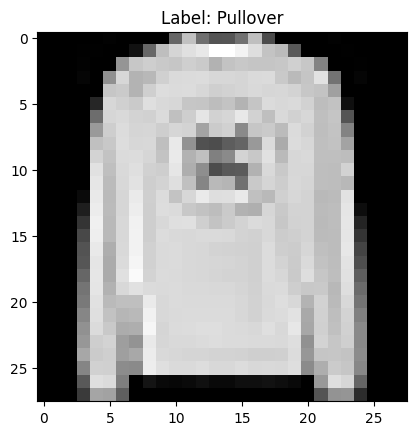

In [60]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

In [61]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
print(report)
list_data = [row.split(',') for row in report.strip().split('\n')]
df = pd.DataFrame(list_data[1:], columns=list_data[0])
df_upd = df.iloc[1:11]
#df_f1_score = df_upd.iloc[0, 0][39:43]
f1_score_dict = {i:0.7+(1-float(df_upd.iloc[i, 0][39:43])) for i in range (0, 10)}
print(f1_score_dict )

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.83      0.81      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.87      0.74      0.80      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.69      0.76      0.72      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

{0: 0.88, 1: 0.72, 2: 0.8899999999999999, 3: 0.8099999999999999, 4: 0.8999999999999999, 5: 0.73, 6: 0.98, 7: 0.75, 8: 0.73, 9: 0.74}


In [62]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8884
[0.4223414659500122, 0.8884000182151794]


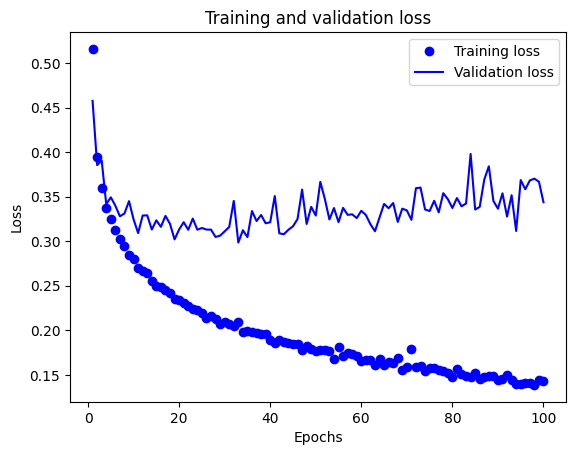

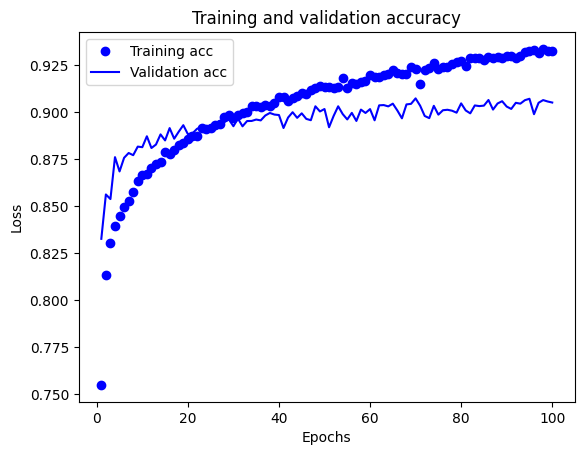

In [63]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [64]:
model.save("Adam_b32_ep100_class")

INFO:tensorflow:Assets written to: Adam_b32_ep100_class\assets


INFO:tensorflow:Assets written to: Adam_b32_ep100_class\assets
